In [1]:
import datetime
import numpy as np

In [2]:
def date_converter(s):
    return datetime.datetime.strptime(str(s), "b'%Y-%m-%d'")

In [3]:
def load_yahoo_data(file_name):
    return np.loadtxt(file_name, delimiter=',', skiprows=1, 
                      dtype=object, converters={0: date_converter, 1: float, 2: float, 3: float, 4: float, 5: float, 6: float})

In [4]:
file_name = 'datasets/TSLA.csv'
raw_data = load_yahoo_data(file_name)

In [5]:
def normalize_data(raw_data):
    raw_data[:, 1:] = raw_data[:, 1:]/np.max(raw_data[:, 1:], 0)
    return raw_data

In [6]:
normalized_data = normalize_data(raw_data)

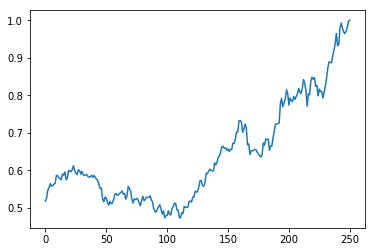

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(normalized_data[:, 4])

In [12]:
def window_transform_series(series, window_size):
    # Create containers for input/output pairs
    x = np.zeros(shape=(len(series)-window_size, window_size), dtype=np.float32)
    y = np.zeros(shape=(len(series)-window_size, 1), dtype=np.float32)
    
    # Produce input/output pairs sliding a window of size window_size over the time series and spacing each window 
    # by one time step
    window_start = 0
    while (window_start + window_size) < len(series):
        x[window_start, :] = series[window_start:window_start + window_size]
        y[window_start] = series[window_start + window_size]
        window_start += 1
    
    return x, y

In [13]:
window_size = 7
x, y = window_transform_series(series=normalized_data[:, 4], window_size=window_size)

In [17]:
# Split the dataset into training/testing sets
train_test_split = int(np.ceil(2*len(y)/float(3)))   # set the split point

# Partition the training set
x_train = x[:train_test_split, :]
y_train = y[:train_test_split]

# Keep the last chunk for testing
x_test = x[train_test_split:, :]
y_test = y[train_test_split:]

# NOTE: to use keras's RNN LSTM module our input must be reshaped to [samples, window size, stepsize] 
x_train = np.asarray(np.reshape(x_train, (x_train.shape[0], window_size, 1)))
x_test = np.asarray(np.reshape(x_test, (x_test.shape[0], window_size, 1)))

In [18]:
# Import keras network libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import keras

# Given - fix random seed - so we can all reproduce the same results on our default time series
np.random.seed(0)

# Build an RNN to perform regression on our time series input/output data
# Create a sequential model
model = Sequential()
# Add a LSTM layer with 5 hidden units and input_shape=(window_size, 1)
model.add(LSTM(5, input_shape=(window_size, 1)))
# Add a Dense layer with linear activation
model.add(Dense(1, activation='linear'))

# build model using keras documentation recommended optimizer initialization
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# compile the model
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Summarize RNN
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 146.0
Trainable params: 146
Non-trainable params: 0.0
_________________________________________________________________


In [19]:
# Train the model
model.fit(x_train, y_train, epochs=1000, batch_size=50, verbose=0)

Epoch 1/1000


 50/163 [========>.....................] - ETA: 2s - loss: 0.1387

150/163 [==========================>...] - ETA: 0s - loss: 0.1364

163/163 [==============================] - 1s - loss: 0.1346     


Epoch 2/1000
 50/163 [========>.....................] - ETA: 0s - loss: 0.1162

150/163 [==========================>...] - ETA: 0s - loss: 0.1054

163/163 [==============================] - 0s - loss: 0.1055     


Epoch 3/1000


 50/163 [========>.....................] - ETA: 0s - loss: 0.0904

150/163 [==========================>...] - ETA: 0s - loss: 0.0871

163/163 [==============================] - 0s - loss: 0.0863     


Epoch 4/1000


 50/163 [========>.....................] - ETA: 0s - loss: 0.0711

150/163 [==========================>...] - ETA: 0s - loss: 0.0717

163/163 [==============================] - 0s - loss: 0.0710     


Epoch 5/1000


 50/163 [========>.....................] - ETA: 0s - loss: 0.0629

150/163 [==========================>...] - ETA: 0s - loss: 0.0581



163/163 [==============================] - 0s - loss: 0.0579     


Epoch 6/1000


 50/163 [========>.....................] - ETA: 0s - loss: 0.0468

150/163 [==========================>...] - ETA: 0s - loss: 0.0460

163/163 [==============================] - 0s - loss: 0.0464     


Epoch 7/1000


 50/163 [========>.....................] - ETA: 0s - loss: 0.0393

100/163 [=================>............] - ETA: 0s - loss: 0.0380



150/163 [==========================>...] - ETA: 0s - loss: 0.0368

163/163 [==============================] - 0s - loss: 0.0363     


Epoch 8/1000


 50/163 [========>.....................] - ETA: 0s - loss: 0.0316

150/163 [==========================>...] - ETA: 0s - loss: 0.0285

163/163 [==============================] - 0s - loss: 0.0279     


Epoch 9/1000


 50/163 [========>.....................] - ETA: 0s - loss: 0.0254

150/163 [==========================>...] - ETA: 0s - loss: 0.0216

163/163 [==============================] - 0s - loss: 0.0209     


Epoch 10/1000

 50/163 [========>.....................] - ETA: 0s - loss: 0.0165

150/163 [==========================>...] - ETA: 0s - loss: 0.0153

163/163 [==============================] - 0s - loss: 0.0151     


Epoch 11/1000


 50/163 [========>.....................] - ETA: 0s - loss: 0.0127

150/163 [==========================>...] - ETA: 0s - loss: 0.0107

163/163 [==============================] - 0s - loss: 0.0104     


Epoch 12/1000


 50/163 [========>.....................] - ETA: 0s - loss: 0.0073

150/163 [==========================>...] - ETA: 0s - loss: 0.0068

163/163 [==============================] - 0s - loss: 0.0068     


Epoch 13/1000


 50/163 [========>.....................] - ETA: 0s - loss: 0.0048

150/163 [==========================>...] - ETA: 0s - loss: 0.0043

163/163 [==============================] - 0s - loss: 0.0042     


Epoch 14/1000


 50/163 [========>.....................] - ETA: 0s - loss: 0.0033

150/163 [==========================>...] - ETA: 0s - loss: 0.0027

163/163 [==============================] - 0s - loss: 0.0027     


Epoch 15/1000


 50/163 [========>.....................] - ETA: 0s - loss: 0.0022

150/163 [==========================>...] - ETA: 0s - loss: 0.0019

163/163 [==============================] - 0s - loss: 0.0018     


Epoch 16/1000


 50/163 [========>.....................] - ETA: 0s - loss: 0.0012

150/163 [==========================>...] - ETA: 0s - loss: 0.0014

163/163 [==============================] - 0s - loss: 0.0014     


Epoch 17/1000


 50/163 [========>.....................] - ETA: 0s - loss: 0.0014

150/163 [==========================>...] - ETA: 0s - loss: 0.0013

163/163 [==============================] - 0s - loss: 0.0013     


Epoch 18/1000


 50/163 [========>.....................] - ETA: 0s - loss: 0.0011

150/163 [==========================>...] - ETA: 0s - loss: 0.0012

163/163 [==============================] - 0s - loss: 0.0012     


Epoch 19/1000


 50/163 [========>.....................] - ETA: 0s - loss: 0.0012

150/163 [==========================>...] - ETA: 0s - loss: 0.0012

163/163 [==============================] - 0s - loss: 0.0012     


Epoch 20/1000


 50/163 [========>.....................] - ETA: 0s - loss: 0.0012

150/163 [==========================>...] - ETA: 0s - loss: 0.0012



163/163 [==============================] - 0s - loss: 0.0012     


Epoch 21/1000
 50/163 [========>.....................] - ETA: 0s - loss: 0.0011

150/163 [==========================>...] - ETA: 0s - loss: 0.0012

163/163 [==============================] - 0s - loss: 0.0012     


Epoch 22/1000


 50/163 [========>.....................] - ETA: 0s - loss: 0.0014

150/163 [==========================>...] - ETA: 0s - loss: 0.0012

163/163 [==============================] - 0s - loss: 0.0012     


Epoch 23/1000
 50/163 [========>.....................] - ETA: 0s - loss: 0.0016

150/163 [==========================>...] - ETA: 0s - loss: 0.0012

163/163 [==============================] - 0s - loss: 0.0012     


Epoch 24/1000


 50/163 [========>.....................] - ETA: 0s - loss: 0.0012

150/163 [==========================>...] - ETA: 0s - loss: 0.0012

163/163 [==============================] - 0s - loss: 0.0012     


Epoch 25/1000


 50/163 [========>.....................] - ETA: 0s - loss: 0.0013

150/163 [==========================>...] - ETA: 0s - loss: 0.0011

163/163 [==============================] - 0s - loss: 0.0012     


Epoch 26/1000
 50/163 [========>.....................] - ETA: 0s - loss: 8.6848e-04

150/163 [==========================>...] - ETA: 0s - loss: 0.0011    

163/163 [==============================] - 0s - loss: 0.0011     


Epoch 27/1000
 50/163 [========>.....................] - ETA: 0s - loss: 0.0011

150/163 [==========================>...] - ETA: 0s - loss: 0.0012

163/163 [==============================] - 0s - loss: 0.0011     


Epoch 28/1000


 50/163 [========>.....................] - ETA: 0s - loss: 0.0013

150/163 [==========================>...] - ETA: 0s - loss: 0.0011

163/163 [==============================] - 0s - loss: 0.0011     


Epoch 29/1000
 50/163 [========>.....................] - ETA: 0s - loss: 0.0012

150/163 [==========================>...] - ETA: 0s - loss: 0.0012

163/163 [==============================] - 0s - loss: 0.0012     


Epoch 30/1000
 50/163 [========>.....................] - ETA: 0s - loss: 0.0014

150/163 [==========================>...] - ETA: 0s - loss: 0.0011

163/163 [==============================] - 0s - loss: 0.0011     


Epoch 31/1000
 50/163 [========>.....................] - ETA: 0s - loss: 9.0187e-04

150/163 [==========================>...] - ETA: 0s - loss: 0.0011    

163/163 [==============================] - 0s - loss: 0.0010     


Epoch 32/1000


 50/163 [========>.....................] - ETA: 0s - loss: 8.0363e-04

150/163 [==========================>...] - ETA: 0s - loss: 0.0010    

163/163 [==============================] - 0s - loss: 0.0010     


Epoch 33/1000


 50/163 [========>.....................] - ETA: 0s - loss: 0.0011



150/163 [==========================>...] - ETA: 0s - loss: 9.2190e-04

163/163 [==============================] - 0s - loss: 9.9455e-04     


Epoch 34/1000


 50/163 [========>.....................] - ETA: 0s - loss: 8.0674e-04

150/163 [==========================>...] - ETA: 0s - loss: 9.6552e-04

163/163 [==============================] - 0s - loss: 9.7495e-04     


Epoch 35/1000


 50/163 [========>.....................] - ETA: 0s - loss: 0.0010

150/163 [==========================>...] - ETA: 0s - loss: 9.4203e-04

163/163 [==============================] - 0s - loss: 9.4871e-04     


Epoch 36/1000


 50/163 [========>.....................] - ETA: 0s - loss: 0.0010

150/163 [==========================>...] - ETA: 0s - loss: 0.0011

163/163 [==============================] - 0s - loss: 0.0010     


Epoch 37/1000
 50/163 [========>.....................] - ETA: 0s - loss: 0.0010

150/163 [==========================>...] - ETA: 0s - loss: 9.4798e-04

163/163 [==============================] - 0s - loss: 9.6315e-04     


Epoch 38/1000
 50/163 [========>.....................] - ETA: 0s - loss: 8.4507e-04

150/163 [==========================>...] - ETA: 0s - loss: 8.9957e-04

163/163 [==============================] - 0s - loss: 9.0262e-04     


Epoch 39/1000


 50/163 [========>.....................] - ETA: 0s - loss: 0.0010

150/163 [==========================>...] - ETA: 0s - loss: 9.2803e-04

163/163 [==============================] - 0s - loss: 9.0578e-04     


Epoch 40/1000


 50/163 [========>.....................] - ETA: 0s - loss: 8.5789e-04

150/163 [==========================>...] - ETA: 0s - loss: 8.8069e-04

163/163 [==============================] - 0s - loss: 8.6612e-04     


Epoch 41/1000


 50/163 [========>.....................] - ETA: 0s - loss: 9.4331e-04

150/163 [==========================>...] - ETA: 0s - loss: 8.2493e-04

163/163 [==============================] - 0s - loss: 8.3889e-04     


Epoch 42/1000
 50/163 [========>.....................] - ETA: 0s - loss: 0.0010

150/163 [==========================>...] - ETA: 0s - loss: 8.2458e-04

163/163 [==============================] - 0s - loss: 8.2702e-04     


Epoch 43/1000


 50/163 [========>.....................] - ETA: 0s - loss: 9.7909e-04

150/163 [==========================>...] - ETA: 0s - loss: 8.6205e-04

163/163 [==============================] - 0s - loss: 8.5308e-04     


Epoch 44/1000


 50/163 [========>.....................] - ETA: 0s - loss: 0.0012

150/163 [==========================>...] - ETA: 0s - loss: 8.5448e-04

163/163 [==============================] - 0s - loss: 8.4311e-04     


Epoch 45/1000
 50/163 [========>.....................] - ETA: 0s - loss: 7.4770e-04

150/163 [==========================>...] - ETA: 0s - loss: 7.6268e-04

163/163 [==============================] - 0s - loss: 8.0856e-04     


Epoch 46/1000
 50/163 [========>.....................] - ETA: 0s - loss: 5.8122e-04

150/163 [==========================>...] - ETA: 0s - loss: 7.6852e-04

163/163 [==============================] - 0s - loss: 7.6302e-04     


Epoch 47/1000
 50/163 [========>.....................] - ETA: 0s - loss: 6.9365e-04

150/163 [==========================>...] - ETA: 0s - loss: 8.0676e-04

163/163 [==============================] - 0s - loss: 7.7464e-04     


Epoch 48/1000
 50/163 [========>.....................] - ETA: 0s - loss: 8.1773e-04

150/163 [==========================>...] - ETA: 0s - loss: 7.5483e-04

163/163 [==============================] - 0s - loss: 7.2579e-04     


Epoch 49/1000
 50/163 [========>.....................] - ETA: 0s - loss: 5.9968e-04

150/163 [==========================>...] - ETA: 0s - loss: 6.8611e-04

163/163 [==============================] - 0s - loss: 7.2194e-04     


Epoch 50/1000
 50/163 [========>.....................] - ETA: 0s - loss: 8.6799e-04

150/163 [==========================>...] - ETA: 0s - loss: 7.5188e-04

163/163 [==============================] - 0s - loss: 7.2269e-04     


Epoch 51/1000


 50/163 [========>.....................] - ETA: 0s - loss: 7.0513e-04

150/163 [==========================>...] - ETA: 0s - loss: 7.1759e-04



163/163 [==============================] - 0s - loss: 7.2504e-04     


Epoch 52/1000


 50/163 [========>.....................] - ETA: 0s - loss: 8.2949e-04

150/163 [==========================>...] - ETA: 0s - loss: 7.6972e-04

163/163 [==============================] - 0s - loss: 7.3645e-04     


Epoch 53/1000


 50/163 [========>.....................] - ETA: 0s - loss: 5.5544e-04

150/163 [==========================>...] - ETA: 0s - loss: 6.7168e-04

163/163 [==============================] - 0s - loss: 6.4764e-04     


Epoch 54/1000


 50/163 [========>.....................] - ETA: 0s - loss: 7.8124e-04

150/163 [==========================>...] - ETA: 0s - loss: 6.3409e-04

163/163 [==============================] - 0s - loss: 6.3006e-04     


Epoch 55/1000


 50/163 [========>.....................] - ETA: 0s - loss: 0.0010

150/163 [==========================>...] - ETA: 0s - loss: 7.1121e-04

163/163 [==============================] - 0s - loss: 7.0111e-04     


Epoch 56/1000


 50/163 [========>.....................] - ETA: 0s - loss: 4.3722e-04

150/163 [==========================>...] - ETA: 0s - loss: 6.1619e-04

163/163 [==============================] - 0s - loss: 6.1958e-04     


Epoch 57/1000


 50/163 [========>.....................] - ETA: 0s - loss: 5.5567e-04

150/163 [==========================>...] - ETA: 0s - loss: 6.4146e-04

163/163 [==============================] - 0s - loss: 6.2800e-04     


Epoch 58/1000


 50/163 [========>.....................] - ETA: 0s - loss: 6.3311e-04

150/163 [==========================>...] - ETA: 0s - loss: 5.6130e-04

163/163 [==============================] - 0s - loss: 5.7350e-04     


Epoch 59/1000


 50/163 [========>.....................] - ETA: 0s - loss: 5.8023e-04

150/163 [==========================>...] - ETA: 0s - loss: 6.7179e-04

163/163 [==============================] - 0s - loss: 6.3277e-04     


Epoch 60/1000


 50/163 [========>.....................] - ETA: 0s - loss: 6.9354e-04

150/163 [==========================>...] - ETA: 0s - loss: 6.0623e-04

163/163 [==============================] - 0s - loss: 5.9772e-04     


Epoch 61/1000


 50/163 [========>.....................] - ETA: 0s - loss: 7.4755e-04

150/163 [==========================>...] - ETA: 0s - loss: 6.0815e-04

163/163 [==============================] - 0s - loss: 5.8659e-04     


Epoch 62/1000


 50/163 [========>.....................] - ETA: 0s - loss: 6.7144e-04

150/163 [==========================>...] - ETA: 0s - loss: 5.8782e-04

163/163 [==============================] - 0s - loss: 5.8802e-04     


Epoch 63/1000


 50/163 [========>.....................] - ETA: 0s - loss: 5.0722e-04

150/163 [==========================>...] - ETA: 0s - loss: 5.0823e-04

163/163 [==============================] - 0s - loss: 5.4826e-04     


Epoch 64/1000


 50/163 [========>.....................] - ETA: 0s - loss: 5.7722e-04

150/163 [==========================>...] - ETA: 0s - loss: 5.4598e-04

163/163 [==============================] - 0s - loss: 5.1198e-04     


Epoch 65/1000


 50/163 [========>.....................] - ETA: 0s - loss: 5.9102e-04

150/163 [==========================>...] - ETA: 0s - loss: 5.5706e-04

163/163 [==============================] - 0s - loss: 5.6088e-04     


Epoch 66/1000


 50/163 [========>.....................] - ETA: 0s - loss: 5.5057e-04

150/163 [==========================>...] - ETA: 0s - loss: 5.5755e-04

163/163 [==============================] - 0s - loss: 5.3758e-04     


Epoch 67/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.0003e-04

150/163 [==========================>...] - ETA: 0s - loss: 4.7630e-04

163/163 [==============================] - 0s - loss: 4.7329e-04     


Epoch 68/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.2469e-04

150/163 [==========================>...] - ETA: 0s - loss: 4.6526e-04

163/163 [==============================] - 0s - loss: 4.8370e-04     


Epoch 69/1000


 50/163 [========>.....................] - ETA: 0s - loss: 5.0670e-04

150/163 [==========================>...] - ETA: 0s - loss: 5.6256e-04

163/163 [==============================] - 0s - loss: 5.4402e-04     


Epoch 70/1000


 50/163 [========>.....................] - ETA: 0s - loss: 5.6823e-04

150/163 [==========================>...] - ETA: 0s - loss: 4.7231e-04

163/163 [==============================] - 0s - loss: 4.6287e-04     


Epoch 71/1000


 50/163 [========>.....................] - ETA: 0s - loss: 4.5637e-04

150/163 [==========================>...] - ETA: 0s - loss: 4.6873e-04

163/163 [==============================] - 0s - loss: 4.6787e-04     


Epoch 72/1000


 50/163 [========>.....................] - ETA: 0s - loss: 4.2882e-04

150/163 [==========================>...] - ETA: 0s - loss: 4.2598e-04

163/163 [==============================] - 0s - loss: 4.5267e-04     


Epoch 73/1000


 50/163 [========>.....................] - ETA: 0s - loss: 4.7394e-04

150/163 [==========================>...] - ETA: 0s - loss: 4.3511e-04

163/163 [==============================] - 0s - loss: 4.3341e-04     


Epoch 74/1000


 50/163 [========>.....................] - ETA: 0s - loss: 7.0254e-04

150/163 [==========================>...] - ETA: 0s - loss: 4.9753e-04

163/163 [==============================] - 0s - loss: 4.7500e-04     


Epoch 75/1000


 50/163 [========>.....................] - ETA: 0s - loss: 4.8843e-04

150/163 [==========================>...] - ETA: 0s - loss: 4.2142e-04

163/163 [==============================] - 0s - loss: 4.2879e-04     


Epoch 76/1000


 50/163 [========>.....................] - ETA: 0s - loss: 7.1517e-04

150/163 [==========================>...] - ETA: 0s - loss: 4.8888e-04

163/163 [==============================] - 0s - loss: 4.8514e-04     


Epoch 77/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.4655e-04

150/163 [==========================>...] - ETA: 0s - loss: 4.3002e-04

163/163 [==============================] - 0s - loss: 4.2423e-04     


Epoch 78/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.0204e-04

150/163 [==========================>...] - ETA: 0s - loss: 3.9373e-04

163/163 [==============================] - 0s - loss: 4.0688e-04     


Epoch 79/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.7213e-04

150/163 [==========================>...] - ETA: 0s - loss: 4.2388e-04

163/163 [==============================] - 0s - loss: 4.1315e-04     


Epoch 80/1000


 50/163 [========>.....................] - ETA: 0s - loss: 4.4044e-04

150/163 [==========================>...] - ETA: 0s - loss: 4.4314e-04

163/163 [==============================] - 0s - loss: 4.3449e-04     


Epoch 81/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.8802e-04

150/163 [==========================>...] - ETA: 0s - loss: 3.9772e-04

163/163 [==============================] - 0s - loss: 4.0457e-04     


Epoch 82/1000


 50/163 [========>.....................] - ETA: 0s - loss: 4.6291e-04

150/163 [==========================>...] - ETA: 0s - loss: 4.0264e-04

163/163 [==============================] - 0s - loss: 4.0613e-04     


Epoch 83/1000


 50/163 [========>.....................] - ETA: 0s - loss: 4.1652e-04

150/163 [==========================>...] - ETA: 0s - loss: 4.0821e-04

163/163 [==============================] - 0s - loss: 3.9099e-04     


Epoch 84/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.5191e-04

150/163 [==========================>...] - ETA: 0s - loss: 3.8266e-04

163/163 [==============================] - 0s - loss: 3.7246e-04     


Epoch 85/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.8783e-04

150/163 [==========================>...] - ETA: 0s - loss: 3.8257e-04

163/163 [==============================] - 0s - loss: 3.8128e-04     


Epoch 86/1000


 50/163 [========>.....................] - ETA: 0s - loss: 5.3135e-04

150/163 [==========================>...] - ETA: 0s - loss: 4.2792e-04

163/163 [==============================] - 0s - loss: 4.1793e-04     


Epoch 87/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.1980e-04

150/163 [==========================>...] - ETA: 0s - loss: 3.6806e-04

163/163 [==============================] - 0s - loss: 3.6635e-04     


Epoch 88/1000


 50/163 [========>.....................] - ETA: 0s - loss: 2.7591e-04

150/163 [==========================>...] - ETA: 0s - loss: 4.0778e-04

163/163 [==============================] - 0s - loss: 3.8191e-04     


Epoch 89/1000


 50/163 [========>.....................] - ETA: 0s - loss: 4.1458e-04



150/163 [==========================>...] - ETA: 0s - loss: 4.0589e-04

163/163 [==============================] - 0s - loss: 3.8156e-04     


Epoch 90/1000
 50/163 [========>.....................] - ETA: 0s - loss: 4.7308e-04

150/163 [==========================>...] - ETA: 0s - loss: 3.7778e-04

163/163 [==============================] - 0s - loss: 3.9566e-04     


Epoch 91/1000


 50/163 [========>.....................] - ETA: 0s - loss: 2.9755e-04

150/163 [==========================>...] - ETA: 0s - loss: 3.3190e-04

163/163 [==============================] - 0s - loss: 3.4607e-04     


Epoch 92/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.3036e-04

150/163 [==========================>...] - ETA: 0s - loss: 3.4839e-04

163/163 [==============================] - 0s - loss: 3.3300e-04     


Epoch 93/1000


 50/163 [========>.....................] - ETA: 0s - loss: 4.0901e-04

150/163 [==========================>...] - ETA: 0s - loss: 3.4609e-04

163/163 [==============================] - 0s - loss: 3.3781e-04     


Epoch 94/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.3969e-04

150/163 [==========================>...] - ETA: 0s - loss: 3.7580e-04

163/163 [==============================] - 0s - loss: 3.7270e-04     


Epoch 95/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.6517e-04

150/163 [==========================>...] - ETA: 0s - loss: 3.4042e-04

163/163 [==============================] - 0s - loss: 3.3734e-04     


Epoch 96/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.0112e-04

150/163 [==========================>...] - ETA: 0s - loss: 3.3536e-04

163/163 [==============================] - 0s - loss: 3.2149e-04     


Epoch 97/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.9355e-04

150/163 [==========================>...] - ETA: 0s - loss: 3.3581e-04

163/163 [==============================] - 0s - loss: 3.3696e-04     


Epoch 98/1000


 50/163 [========>.....................] - ETA: 0s - loss: 6.6659e-04

150/163 [==========================>...] - ETA: 0s - loss: 4.6095e-04

163/163 [==============================] - 0s - loss: 4.5273e-04     


Epoch 99/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.2658e-04

150/163 [==========================>...] - ETA: 0s - loss: 3.4311e-04

163/163 [==============================] - 0s - loss: 3.4552e-04     


Epoch 100/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.0107e-04

150/163 [==========================>...] - ETA: 0s - loss: 3.3420e-04

163/163 [==============================] - 0s - loss: 3.2886e-04     


Epoch 101/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.3402e-04

150/163 [==========================>...] - ETA: 0s - loss: 3.1754e-04

163/163 [==============================] - 0s - loss: 3.1280e-04     


Epoch 102/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.1686e-04

150/163 [==========================>...] - ETA: 0s - loss: 2.9463e-04

163/163 [==============================] - 0s - loss: 3.0778e-04     


Epoch 103/1000


 50/163 [========>.....................] - ETA: 0s - loss: 4.8705e-04

100/163 [=================>............] - ETA: 0s - loss: 4.1689e-04

163/163 [==============================] - 0s - loss: 3.7894e-04     


Epoch 104/1000


 50/163 [========>.....................] - ETA: 0s - loss: 2.6567e-04

100/163 [=================>............] - ETA: 0s - loss: 3.0579e-04

150/163 [==========================>...] - ETA: 0s - loss: 2.9656e-04

163/163 [==============================] - 0s - loss: 3.0373e-04     


Epoch 105/1000


 50/163 [========>.....................] - ETA: 0s - loss: 4.1293e-04

150/163 [==========================>...] - ETA: 0s - loss: 3.8347e-04

163/163 [==============================] - 0s - loss: 3.8342e-04     


Epoch 106/1000


 50/163 [========>.....................] - ETA: 0s - loss: 2.2830e-04

150/163 [==========================>...] - ETA: 0s - loss: 2.7717e-04

163/163 [==============================] - 0s - loss: 3.1987e-04     


Epoch 107/1000
 50/163 [========>.....................] - ETA: 0s - loss: 6.7295e-04

150/163 [==========================>...] - ETA: 0s - loss: 4.3828e-04

163/163 [==============================] - 0s - loss: 4.1425e-04     


Epoch 108/1000


 50/163 [========>.....................] - ETA: 0s - loss: 2.3912e-04

150/163 [==========================>...] - ETA: 0s - loss: 2.9911e-04

163/163 [==============================] - 0s - loss: 2.9831e-04     


Epoch 109/1000


 50/163 [========>.....................] - ETA: 0s - loss: 2.5900e-04

150/163 [==========================>...] - ETA: 0s - loss: 3.2432e-04



163/163 [==============================] - 0s - loss: 3.2112e-04     


Epoch 110/1000
 50/163 [========>.....................] - ETA: 0s - loss: 2.4008e-04

150/163 [==========================>...] - ETA: 0s - loss: 2.9512e-04

163/163 [==============================] - 0s - loss: 2.9938e-04     


Epoch 111/1000


 50/163 [========>.....................] - ETA: 0s - loss: 2.9758e-04

150/163 [==========================>...] - ETA: 0s - loss: 2.9572e-04

163/163 [==============================] - 0s - loss: 3.0208e-04     


Epoch 112/1000


 50/163 [========>.....................] - ETA: 0s - loss: 5.5574e-04

150/163 [==========================>...] - ETA: 0s - loss: 4.4441e-04

163/163 [==============================] - 0s - loss: 4.2919e-04     


Epoch 113/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.0779e-04

150/163 [==========================>...] - ETA: 0s - loss: 2.9280e-04

163/163 [==============================] - 0s - loss: 2.9195e-04     


Epoch 114/1000


 50/163 [========>.....................] - ETA: 0s - loss: 4.2250e-04

100/163 [=================>............] - ETA: 0s - loss: 4.1653e-04

150/163 [==========================>...] - ETA: 0s - loss: 3.5583e-04

163/163 [==============================] - 0s - loss: 3.4863e-04     


Epoch 115/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.0351e-04

150/163 [==========================>...] - ETA: 0s - loss: 3.1124e-04

163/163 [==============================] - 0s - loss: 3.0335e-04     


Epoch 116/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.5042e-04

100/163 [=================>............] - ETA: 0s - loss: 3.4297e-04

163/163 [==============================] - 0s - loss: 3.0696e-04     


Epoch 117/1000


 50/163 [========>.....................] - ETA: 0s - loss: 2.1790e-04



150/163 [==========================>...] - ETA: 0s - loss: 3.0453e-04

163/163 [==============================] - 0s - loss: 3.2926e-04     


Epoch 118/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.4161e-04

100/163 [=================>............] - ETA: 0s - loss: 3.2730e-04

150/163 [==========================>...] - ETA: 0s - loss: 3.2127e-04

163/163 [==============================] - 0s - loss: 3.1124e-04     


Epoch 119/1000


 50/163 [========>.....................] - ETA: 0s - loss: 2.7848e-04

150/163 [==========================>...] - ETA: 0s - loss: 2.8472e-04

163/163 [==============================] - 0s - loss: 3.0548e-04     


Epoch 120/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.9993e-04

100/163 [=================>............] - ETA: 0s - loss: 3.4636e-04

163/163 [==============================] - 0s - loss: 3.4742e-04     


Epoch 121/1000


 50/163 [========>.....................] - ETA: 0s - loss: 2.6605e-04



150/163 [==========================>...] - ETA: 0s - loss: 3.1239e-04

163/163 [==============================] - 0s - loss: 3.1450e-04     


Epoch 122/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.1497e-04

150/163 [==========================>...] - ETA: 0s - loss: 3.0069e-04



163/163 [==============================] - 0s - loss: 3.0460e-04     


Epoch 123/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.6721e-04

150/163 [==========================>...] - ETA: 0s - loss: 2.9361e-04

163/163 [==============================] - 0s - loss: 3.1894e-04     


Epoch 124/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.9171e-04

150/163 [==========================>...] - ETA: 0s - loss: 3.4910e-04

163/163 [==============================] - 0s - loss: 3.2551e-04     


Epoch 125/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.7625e-04



100/163 [=================>............] - ETA: 0s - loss: 3.8518e-04

163/163 [==============================] - 0s - loss: 3.1362e-04     


Epoch 126/1000


 50/163 [========>.....................] - ETA: 0s - loss: 2.1304e-04

150/163 [==========================>...] - ETA: 0s - loss: 3.0432e-04

163/163 [==============================] - 0s - loss: 3.0581e-04     


Epoch 127/1000
 50/163 [========>.....................] - ETA: 0s - loss: 5.0455e-04

150/163 [==========================>...] - ETA: 0s - loss: 3.4140e-04

163/163 [==============================] - 0s - loss: 3.4115e-04     


Epoch 128/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.0895e-04

150/163 [==========================>...] - ETA: 0s - loss: 2.9977e-04

163/163 [==============================] - 0s - loss: 2.9133e-04     


Epoch 129/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.0176e-04

150/163 [==========================>...] - ETA: 0s - loss: 3.0174e-04

163/163 [==============================] - 0s - loss: 2.8780e-04     


Epoch 130/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.9979e-04

150/163 [==========================>...] - ETA: 0s - loss: 4.2501e-04

163/163 [==============================] - 0s - loss: 4.0347e-04     


Epoch 131/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.8931e-04

150/163 [==========================>...] - ETA: 0s - loss: 3.6381e-04

163/163 [==============================] - 0s - loss: 3.4466e-04     


Epoch 132/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.3425e-04

150/163 [==========================>...] - ETA: 0s - loss: 2.6754e-04

163/163 [==============================] - 0s - loss: 2.8070e-04     


Epoch 133/1000


 50/163 [========>.....................] - ETA: 0s - loss: 5.9364e-04

150/163 [==========================>...] - ETA: 0s - loss: 4.0085e-04

163/163 [==============================] - 0s - loss: 3.9186e-04     


Epoch 134/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.0315e-04

150/163 [==========================>...] - ETA: 0s - loss: 2.8944e-04

163/163 [==============================] - 0s - loss: 2.9585e-04     


Epoch 135/1000


 50/163 [========>.....................] - ETA: 0s - loss: 3.0995e-04

150/163 [==========================>...] - ETA: 0s - loss: 2.8457e-04

163/163 [==============================] - 0s - loss: 2.8766e-04     


Epoch 136/1000


 50/163 [========>.....................]

 - ETA: 0s - loss: 3.6742e-04

100/163 [=================>............] - ETA: 0s - loss: 3.3285e-04

163/163 [==============================] - 0s - loss: 2.8889e-04     


Epoch 137/1000


 50/163 [========>.....................] - ETA: 0s - loss: 2.7871e-04

150/163 [==========================>...] - ETA: 0s - loss: 3.4853e-04

KeyboardInterrupt: 